### aim: calculate co2flux and southern ocean pco2 cycle for medusa file output

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
# /gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED

def make_yrlist_medusa(runname, yrstart, yrend):
    ylist = []
    for y in range(yrstart, yrend):
        w = glob.glob(f'/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_{runname}_*{y}*.nc')
        ylist.append(w[0])
        
    return ylist

ylist = make_yrlist_medusa('cj200',1990,2015)
print(ylist)

t = xr.open_mfdataset(ylist)

['/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1990_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1991_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1992_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1993_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1994_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1995_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1996_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1997_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1998_diad-T-subset.nc', '/gpfs/data/greenocean/software/resources/MEDUSA/PROCESSED/medusa_cj200_1y_1999_diad-T-subset.nc', '/gpfs/da

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


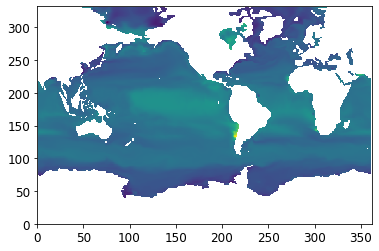

In [6]:
plt.pcolormesh(t['OCN_PCO2'][0,:,:])

surfocean = np.zeros(300)
for i in range(0,300):
    masked_data = np.ma.masked_array(t['OCN_PCO2'][i,:,:], np.isnan(t['OCN_PCO2'][0,:,:]))
    surfocean[i] = np.ma.average(masked_data, weights = t['area'][0,:,:].values)

In [7]:
print(surfocean)

[338.17459122 340.10611406 341.72428483 342.10874664 341.38326508
 341.00724027 342.09592298 344.08254977 344.11655258 341.01395407
 338.6338158  338.40275151 340.767313   342.83205008 344.01473706
 343.64883802 342.53559412 342.02813605 342.37573439 344.5368711
 343.99561168 341.63273495 338.83559786 338.6514576  340.90710835
 343.20527798 343.89738249 343.7089365  342.67824323 341.7465497
 343.61454476 345.62853607 344.8781078  342.07213864 339.66087719
 339.21993238 341.65215103 344.51501311 345.77587867 346.00320578
 344.33370429 343.53019068 344.64810392 346.69942036 345.47177445
 343.68656374 341.66905811 341.66206678 343.71187007 346.53983864
 347.73737561 347.36413856 346.32516547 345.4953023  346.78284331
 348.25669057 347.86506535 345.45392272 343.24993702 343.03880646
 345.23209348 347.79462806 349.17021375 349.21710424 347.87341124
 348.03064565 349.01746318 350.90338352 350.60237698 347.85636408
 345.72830687 345.16344056 346.83657314 349.24456907 350.84945347
 350.5755164

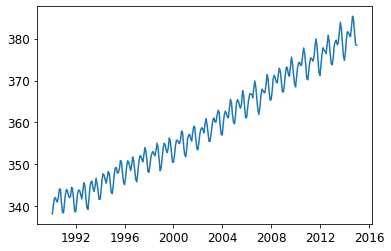

In [8]:
plt.plot(t['time_counter'].values,surfocean)

In [ ]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [35]:
ylist = make_yrlist_medusa('cj200',1990,1995)
t = xr.open_mfdataset(ylist)
pco2_monthly = t['OCN_PCO2'].groupby('time_counter.month').mean('time_counter').values
pco2_monthly= np.ma.masked_array(pco2_monthly, np.isnan(pco2_monthly))


yrst = 1990; yrend = 1995; tr = 'TOM12_TJ_1ASA'; dtype = 'diad_T'
baseDir = '/gpfs/data/greenocean/software/runs/'
ylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
t2 = xr.open_mfdataset(ylist)
pco2_monthly_tom = t2['pCO2'].groupby('time_counter.month').mean('time_counter').values
pco2_monthly_tom= np.ma.masked_array(pco2_monthly_tom, np.isnan(pco2_monthly_tom))
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

csize = tmesh['csize'].values

In [37]:
medusa_pco2 = np.zeros([12])
tom_pco2 =  np.zeros([12])

for i in range(0,12):
    medusa_pco2[i] = \
    (np.ma.average(pco2_monthly[i,0:113,:], weights = t['area'][0,:113,:]))
    tom_pco2[i] = (np.ma.average(pco2_monthly_tom[i,0:37,:], weights = csize[0:37,:]))

#tar = 
#Acj198o_co2flux_so[i] = np.nansum(cj198o_co2flux[i,0:113,:] * tar[0:113,:])

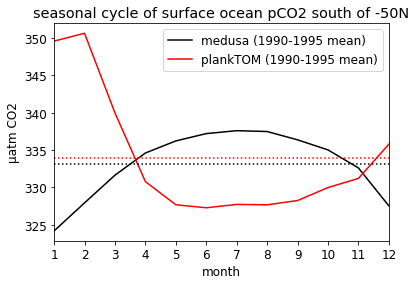

In [51]:
plt.figure()
plt.plot(np.arange(1,13,1),medusa_pco2, color = 'k', label = 'medusa (1990-1995 mean)')
plt.plot(np.arange(1,13,1),tom_pco2, color = 'r', label = 'plankTOM (1990-1995 mean)')
plt.axhline(np.nanmean(medusa_pco2), color = 'k', linestyle = ':')
plt.axhline(np.nanmean(tom_pco2), color = 'r', linestyle = ':')
q = plt.xticks(np.arange(1,13,1))
plt.xlabel('month')
plt.ylabel('µatm CO2')
plt.xlim([1,12])
plt.title('seasonal cycle of surface ocean pCO2 south of -50N')
plt.legend()

In [33]:
w['pCO2']

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 72, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 1990-01-16 12:00:00 ... 1995-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMES                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMAC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPTDOC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPT                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    TChl                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Detrit                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Carniv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Herbiv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMICPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMESPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMACPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    nitrfix               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    denitr                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DELO2                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    vsink                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    sinksil               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    discarb               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpCO3                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpARA                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAGEL                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAPTE                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    proara                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    prococ      

In [ ]:
    t_yearlist = make_yearlist(tmin,tmax, 'diad', tr, baseDir)
    yrs = np.arange(tmin, tmax+1,1)
    t_ds = xr.open_mfdataset(t_yearlist)    
    #cflx is in mol/m2/s, multiply by m2 in meshmask to get mol/s/grid cell
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
